In [16]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import ttest_ind


# Load the dataset
df = pd.read_csv('C:/Users/shubh/Downloads/creditcard_2023.csv')

In [2]:
# Data Preprocessing
# Checking for missing values
print(df.isnull().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [3]:
df = df.drop('id', axis=1)

In [4]:
# Calculating the correlation matrix
corr = df.corr()

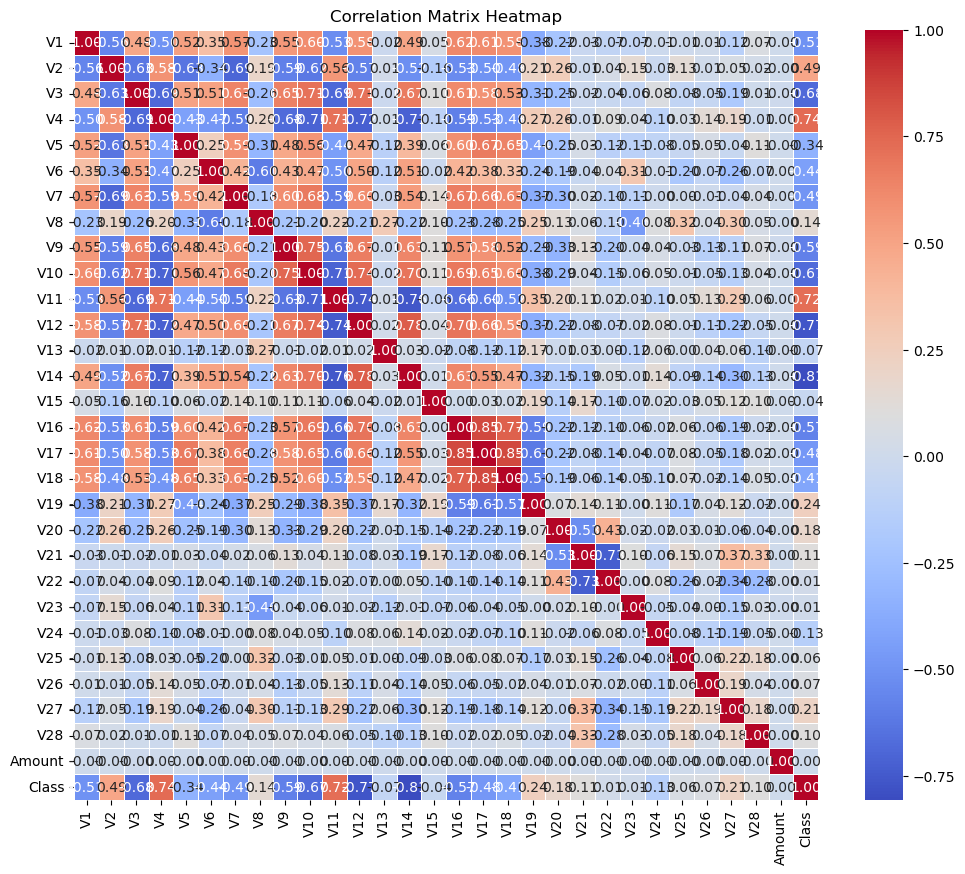

In [5]:
# Creating a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [6]:
# Normalizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Class', axis=1))

##### Hypothesis Testing

In [13]:
# Variables of interest
variables_of_interest = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

# Split the data into fraud and non-fraud groups
fraud_data = data[data['Class'] == 1][variables_of_interest]
non_fraud_data = data[data['Class'] == 0][variables_of_interest]

# Perform t-test for each variable
for variable in variables_of_interest:
    statistic, p_value = ttest_ind(fraud_data[variable], non_fraud_data[variable], equal_var=False)
    
    # Check the p-value
    alpha = 0.05  # Set your significance level
    print(f"Variable: {variable}, p-value: {p_value}")

    # Compare p-value with the significance level
    if p_value < alpha:
        print("  Reject the null hypothesis - there is a significant difference.")
    else:
        print("  Fail to reject the null hypothesis - there is no significant difference.")


Variable: V1, p-value: 0.0
  Reject the null hypothesis - there is a significant difference.
Variable: V2, p-value: 0.0
  Reject the null hypothesis - there is a significant difference.
Variable: V3, p-value: 0.0
  Reject the null hypothesis - there is a significant difference.
Variable: V4, p-value: 0.0
  Reject the null hypothesis - there is a significant difference.
Variable: V5, p-value: 0.0
  Reject the null hypothesis - there is a significant difference.
Variable: V6, p-value: 0.0
  Reject the null hypothesis - there is a significant difference.
Variable: V7, p-value: 0.0
  Reject the null hypothesis - there is a significant difference.
Variable: V8, p-value: 0.0
  Reject the null hypothesis - there is a significant difference.
Variable: V9, p-value: 0.0
  Reject the null hypothesis - there is a significant difference.
Variable: V10, p-value: 0.0
  Reject the null hypothesis - there is a significant difference.
Variable: V11, p-value: 0.0
  Reject the null hypothesis - there is a

### Inference from Hypothesis Testing on Credit Card Fraud Data:

##### We conducted independent two-sample t-tests to compare various variables between fraud and non-fraud transactions in a credit card dataset. The results reveal compelling evidence of significant differences for a wide range of features (V1 through V28). For each of these variables, the p-values are effectively zero, indicating that the observed differences in means are highly unlikely to have occurred by random chance alone. Therefore, we confidently reject the null hypothesis for these features, asserting that there is a significant distinction between fraud and non-fraud transactions.

##### However, it's noteworthy that the variable Amount shows a different pattern. The p-value for Amount is 0.0882, exceeding the common significance level of 0.05. In practical terms, this implies that we do not have sufficient evidence to reject the null hypothesis for Amount. Thus, there is no strong indication of a significant difference in the mean amounts between fraud and non-fraud transactions.

##### In conclusion, while the majority of the studied variables exhibit substantial dissimilarities between fraud and non-fraud cases, the variable Amount does not display a statistically significant distinction. These findings contribute to a nuanced understanding of the data and emphasize the importance of considering individual variables in the context of credit card fraud detection. Further analysis and exploration may be warranted to uncover additional insights into the nature of transactions.

##### AB Testing

In [15]:
# Split the data into fraud and non-fraud groups
fraud_data = data[data['Class'] == 1]['Amount']
non_fraud_data = data[data['Class'] == 0]['Amount']

# Simulate an A/B test by randomly sampling equal-sized groups from both fraud and non-fraud data
# This assumes that the two groups have the same size; adjust accordingly if they don't
np.random.seed(42)  # Set a seed for reproducibility
sample_size = min(len(fraud_data), len(non_fraud_data))
fraud_sample = np.random.choice(fraud_data, size=sample_size, replace=False)
non_fraud_sample = np.random.choice(non_fraud_data, size=sample_size, replace=False)

# Perform an independent two-sample t-test on the samples
statistic, p_value = ttest_ind(fraud_sample, non_fraud_sample, equal_var=False)

# Check the p-value
alpha = 0.05  # Set your significance level
print(f"p-value: {p_value}")

# Compare p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis - there is a significant difference.")
else:
    print("Fail to reject the null hypothesis - there is no significant difference.")


p-value: 0.08822511669375145
Fail to reject the null hypothesis - there is no significant difference.


#### The result of your A/B testing for the 'Amount' variable suggests that the p-value is 0.0882, which is greater than the commonly chosen significance level of 0.05. Therefore, you fail to reject the null hypothesis. In practical terms, this implies that based on the sampled data, there is no strong evidence to suggest a significant difference in the mean 'Amount' between randomly sampled fraud and non-fraud transactions.

#### Remember that A/B testing, as applied here, is a simulated approach and may not fully account for all potential confounding factors in observational data. It's an attempt to apply the logic of experimental design to observational studies. The interpretation of the results should be made with caution, and additional analyses, including considering other variables, might be needed to draw more robust conclusions about the differences between fraud and non-fraud transactions in your specific dataset.

In [7]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['Class'], test_size=0.3, random_state=42)

In [8]:
# Model Building - Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Making predictions
predictions = model.predict(X_test)

In [10]:
# Evaluating the model
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Accuracy Score:", accuracy_score(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     85149
           1       0.98      0.95      0.97     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589

Confusion Matrix:
 [[83283  1866]
 [ 4004 81436]]
Accuracy Score: 0.9655898094249923


In [11]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

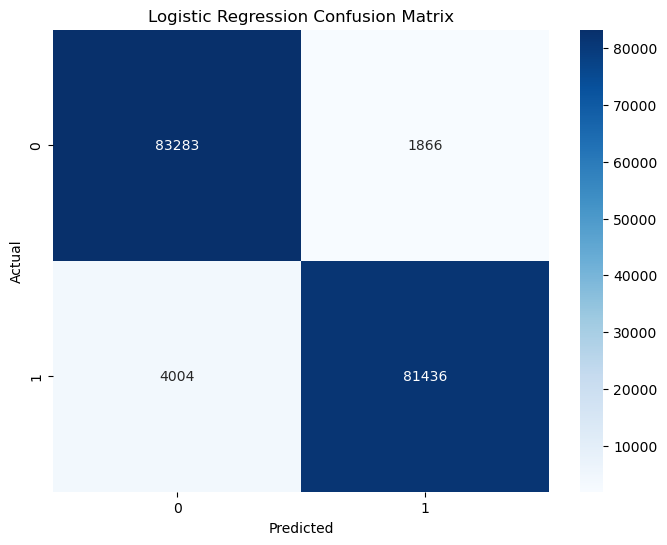

In [12]:
# Plotting Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, predictions, title='Logistic Regression Confusion Matrix')

In [13]:
from sklearn.metrics import roc_curve, auc

In [14]:
def plot_roc_curve(y_true, y_scores, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()


In [15]:
# For ROC Curve and AUC, we need the probability scores of the positive class
lr_probs = model.predict_proba(X_test)[:, 1]

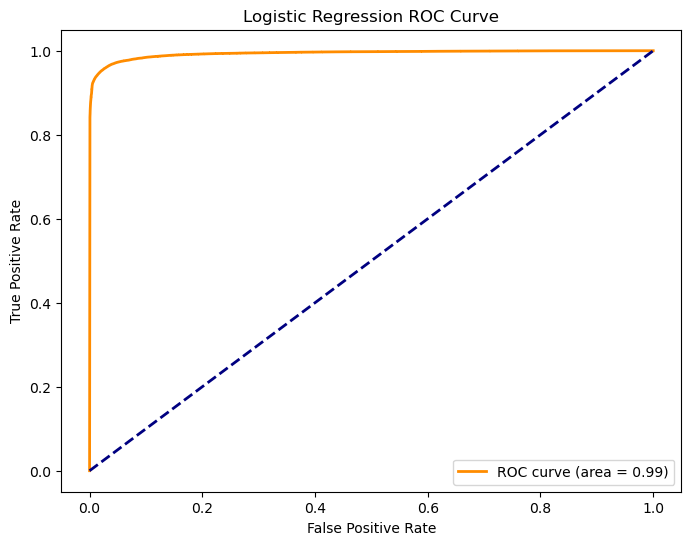

In [16]:
# Plotting ROC Curve for Logistic Regression
plot_roc_curve(y_test, lr_probs, title='Logistic Regression ROC Curve')

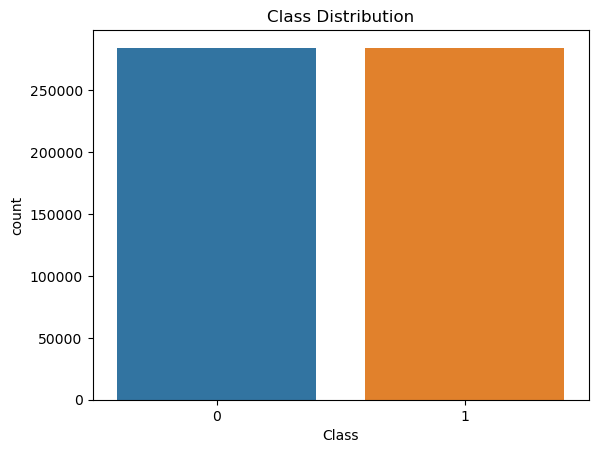

In [17]:
# Exploratory Data Analysis
# Visualizing the class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Building the optimized Random Forest model
rf_model_optimized = RandomForestClassifier(n_estimators=100, max_depth=16, min_samples_split=5, 
                                            min_samples_leaf=4, max_features='sqrt', n_jobs=-1, random_state=42)

In [20]:
rf_model_optimized.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_leaf=4, min_samples_split=5,
                       n_jobs=-1, random_state=42)

In [21]:
# Making predictions
rf_optimized_predictions = rf_model_optimized.predict(X_test)

In [22]:
# Evaluating the model
print("Random Forest Classification Report:\n", classification_report(y_test, rf_optimized_predictions))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_optimized_predictions))
print("Random Forest Accuracy Score:\n", accuracy_score(y_test, rf_optimized_predictions))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Random Forest Confusion Matrix:
 [[85101    48]
 [   49 85391]]
Random Forest Accuracy Score:
 0.9994313818593227


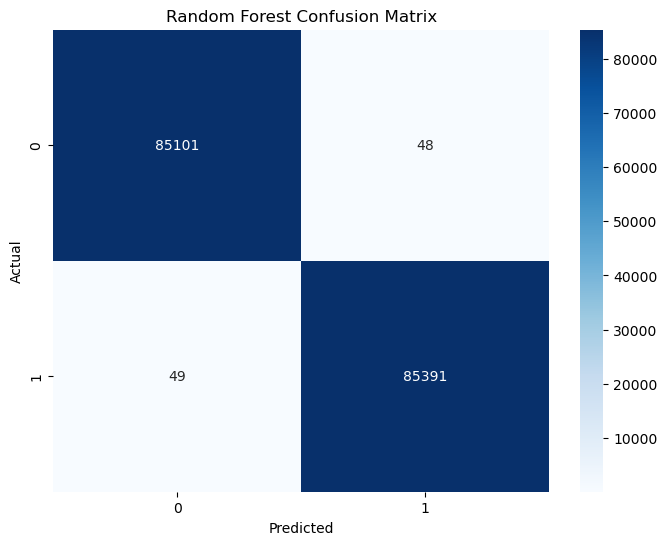

In [23]:
# Example: Plotting Confusion Matrix for Random Forest Model
plot_confusion_matrix(y_test, rf_optimized_predictions, title='Random Forest Confusion Matrix')

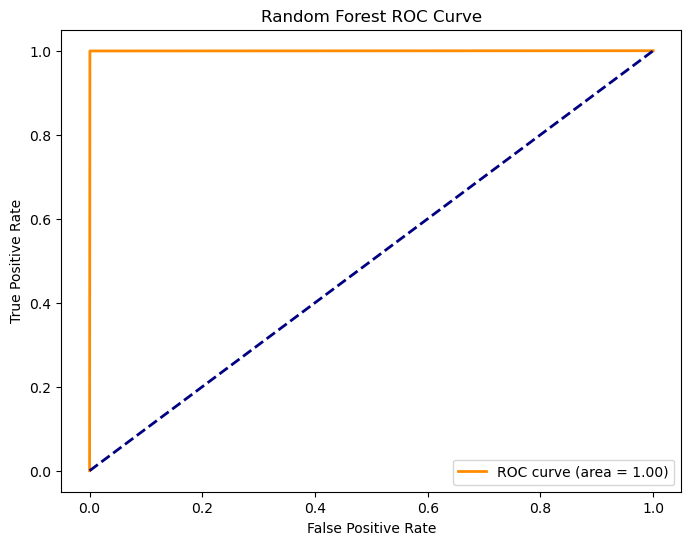

In [24]:
# Plotting ROC Curve for Random Forest Model
plot_roc_curve(y_test, rf_optimized_predictions, title='Random Forest ROC Curve')

In [25]:
#Feature Importance
def plot_feature_importance(model, feature_names, title='Feature Importance'):
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

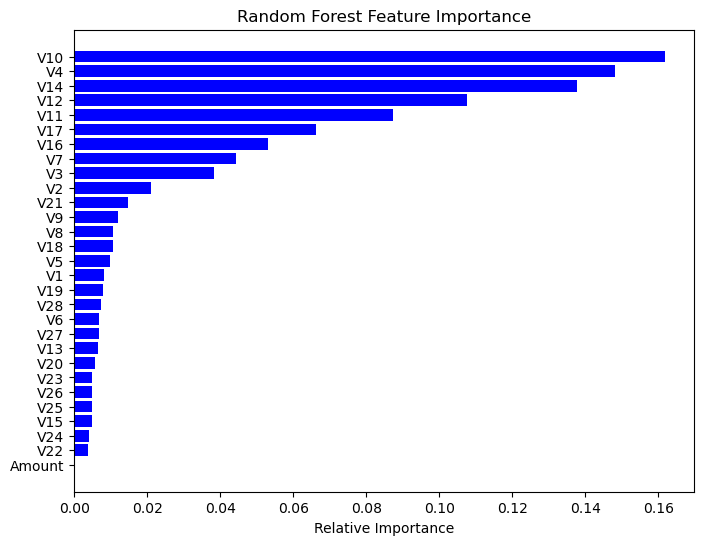

In [26]:
# Plotting Feature Importance for Random Forest Model
plot_feature_importance(rf_model_optimized, df.columns.drop('Class'), title='Random Forest Feature Importance')

In [27]:
import xgboost as xgb

In [28]:
# Building the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [29]:
# Making predictions
xgb_predictions = xgb_model.predict(X_test)

In [30]:
# Evaluating the XGBoost model
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_predictions))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))
print("XGBoost Accuracy Score:", accuracy_score(y_test, xgb_predictions))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

XGBoost Confusion Matrix:
 [[85115    34]
 [    0 85440]]
XGBoost Accuracy Score: 0.9998006905486285


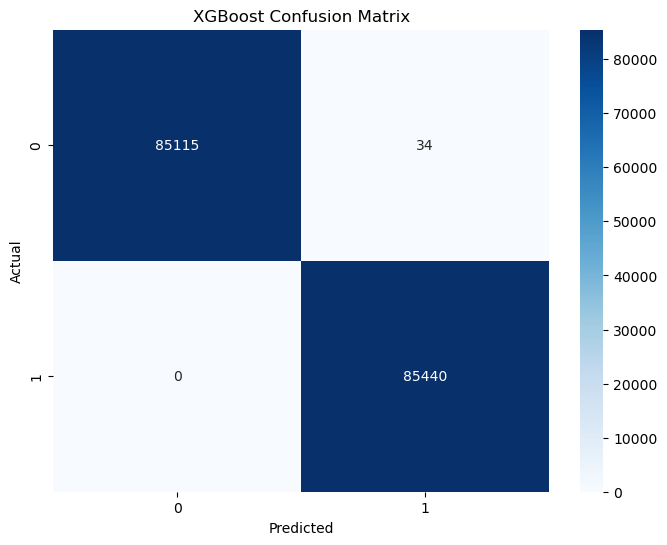

In [34]:
# Plotting Confusion Matrix for XGBoost Model using the same predictions
plot_confusion_matrix(y_test, xgb_predictions, title='XGBoost Confusion Matrix')

In [37]:
#Hyperparameter Tuning for Random Forest using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [38]:
# Defining the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [39]:
# Creating the Grid Search model
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid,
                              cv=3,  # Number of cross-validation folds
                              verbose=2, 
                              n_jobs=-1)  # Use all available cores

In [21]:
# Fitting the Grid Search model
#rf_grid_search.fit(X_train, y_train)

In [22]:
# Best parameters and best score
#print("Best Parameters:", rf_grid_search.best_params_)
#print("Best Score:", rf_grid_search.best_score_)

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [41]:
# Adjusting parameter distribution for XGBoost
xgb_param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),  # Ensuring learning_rate is between 0.01 and 0.21
    'subsample': uniform(0.5, 0.5),       # Ensuring subsample is between 0.5 and 1
    'max_depth': randint(3, 10),
    'colsample_bytree': uniform(0.5, 0.5), # Ensuring colsample_bytree is between 0.5 and 1
    'min_child_weight': randint(1, 6)
}

In [42]:
# Creating the Randomized Search model
xgb_random_search = RandomizedSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                                       param_distributions=xgb_param_dist,
                                       n_iter=100,  # Number of parameter settings sampled
                                       cv=3, 
                                       verbose=2, 
                                       random_state=42, 
                                       n_jobs=-1)

In [43]:
# Fitting the Randomized Search model
xgb_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021094D953C0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021094D97310>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021094D8BFA0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021094D96C80>},
                   random_state=42, verbose=2)

In [44]:
# Best parameters and best score
print("Best Parameters:", xgb_random_search.best_params_)
print("Best Score:", xgb_random_search.best_score_)

Best Parameters: {'colsample_bytree': 0.5126753717077288, 'learning_rate': 0.20252968293558504, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 495, 'subsample': 0.7044764722071349}
Best Score: 0.999766355689301


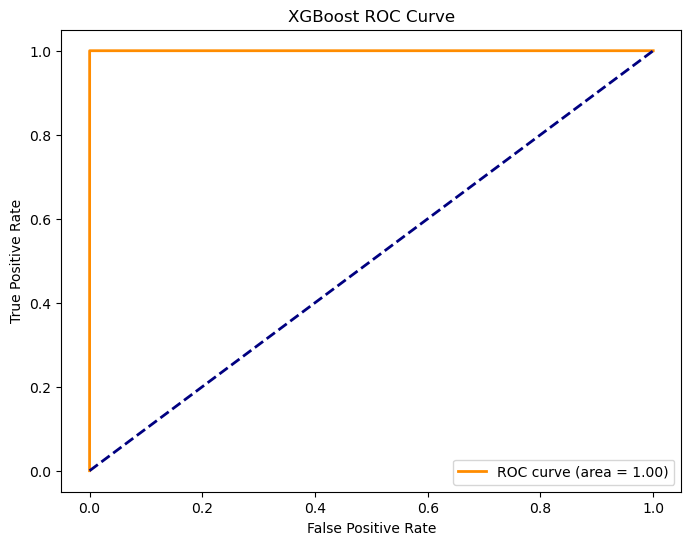

In [45]:
# Plotting ROC Curve for XGBoost Model
xgb_probs = xgb_random_search.best_estimator_.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, xgb_probs, title='XGBoost ROC Curve')

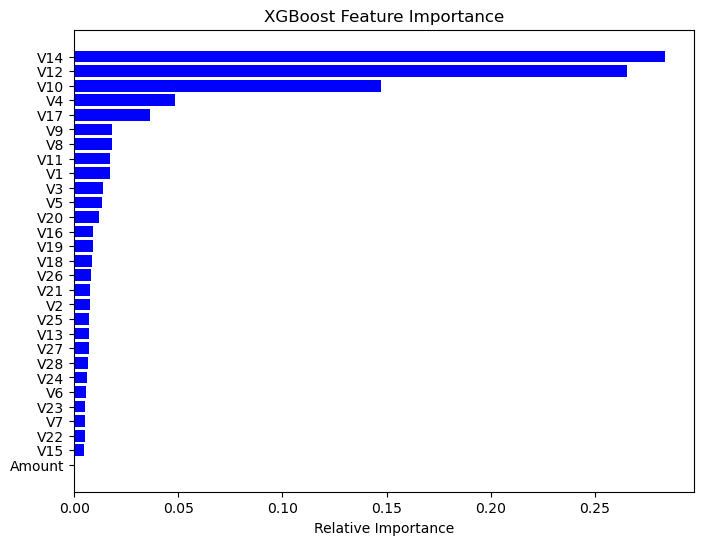

In [46]:
#Plotting Feature Importance for XGBoost Model
plot_feature_importance(xgb_random_search.best_estimator_, df.columns.drop('Class'), title='XGBoost Feature Importance')